IDEA:

Is there any personal factors of customers (like age) related to number of riding? 

NULL HYPOTHESIS: 

The proportion of weekend trips taken by riders born after 1990 is the same or less than the proportion of weekend trips taken by riders born in or before 1990.


H0: 

proportion(younger) - proportion(older) <= 0

ALTERNATIVE HYPOTHESIS: 

The proportion of weekend trips taken by riders born after 1990 is greater than the proportion of weekend trips taken by riders born in or before 1990.


HA: 

proportion(younger) - proportion(older) > 0

Alpha level: 0.05

In [84]:
from __future__ import print_function
import os
import pylab as pl
from zipfile import PyZipFile
import pandas as pd
from dateutil import parser

%pylab inline

puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


In [85]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [86]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yy2908/PUIdata


In [87]:
!curl https://s3.amazonaws.com/tripdata/JC-201805-citibike-tripdata.csv.zip > bikedata.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  887k  100  887k    0     0  5411k      0 --:--:-- --:--:-- --:--:-- 5414k


In [88]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [89]:
bikedata = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [90]:
bikedata.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1


In [91]:
bikedata.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [92]:
bikedata.size

4283280

In [93]:
df = bikedata[['tripduration','birth year', 'starttime', 'gender']]

In [94]:
df.tail(10)

,tripduration,birth year,starttime,gender
285542,429,1991.0,1/31/2015 23:54,1
285543,229,1985.0,1/31/2015 23:55,2
285544,401,1971.0,1/31/2015 23:56,1
285545,296,1983.0,1/31/2015 23:56,1
285546,993,1970.0,1/31/2015 23:57,1
285547,169,1956.0,1/31/2015 23:57,1
285548,827,1976.0,1/31/2015 23:58,1
285549,798,1994.0,1/31/2015 23:58,1
285550,725,1957.0,1/31/2015 23:58,1
285551,892,1974.0,1/31/2015 23:59,1


In [143]:
df1 = df[df['birth year'] < 1990.0].reset_index()
df1['Total'] = df2['index'].sum()
df1.head()

,index,tripduration,birth year,starttime,gender,ratio,date,>1990,Total
0,0,1346,1960.0,1/1/2015 0:01,2,0.984430,2015-01-01 00:01:00,0.0,1959425167
1,1,363,1963.0,1/1/2015 0:02,1,0.985937,2015-01-01 00:02:00,0.0,1959425167
2,2,346,1974.0,1/1/2015 0:04,1,0.988978,2015-01-01 00:04:00,0.0,1959425167
3,3,182,1969.0,1/1/2015 0:04,1,0.987958,2015-01-01 00:04:00,0.0,1959425167
4,4,969,1977.0,1/1/2015 0:05,1,0.990481,2015-01-01 00:05:00,0.0,1959425167


In [106]:
df2 = df[df['birth year'] > 1990.0].reset_index()
df2['Total'] = df2['index'].sum()
df2.head()

,index,tripduration,birth year,starttime,gender,Total
0,8,846,1991.0,1/1/2015 0:09,1,1959425167
1,9,576,1991.0,1/1/2015 0:10,1,1959425167
2,27,1639,1996.0,1/1/2015 0:22,2,1959425167
3,54,232,1993.0,1/1/2015 0:32,1,1959425167
4,109,1384,1996.0,1/1/2015 0:58,2,1959425167


/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


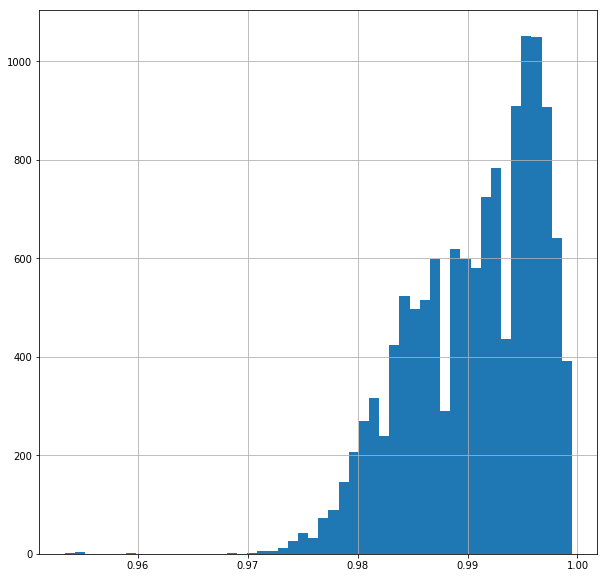

In [108]:
df['ratio'] = df1['birth year']/df2['birth year']
df['ratio'].hist(bins=50)

In [107]:
df2.shape

(13012, 6)

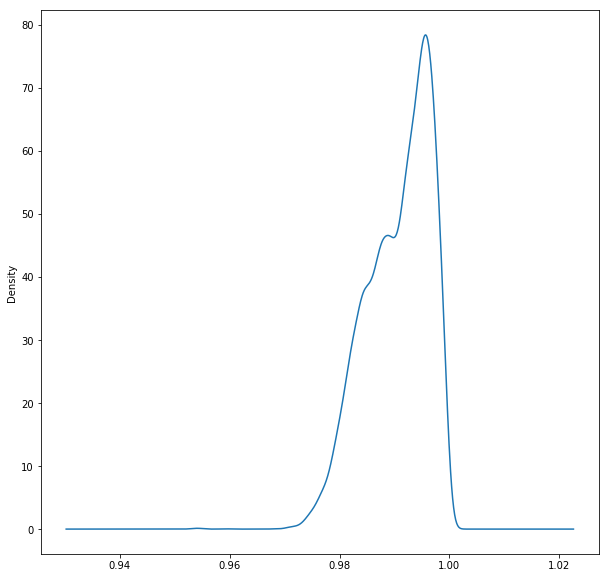

In [109]:
df['ratio'].plot(kind='kde')

Text(0.5,1,'Changes in log birth year vs. log tripduration')

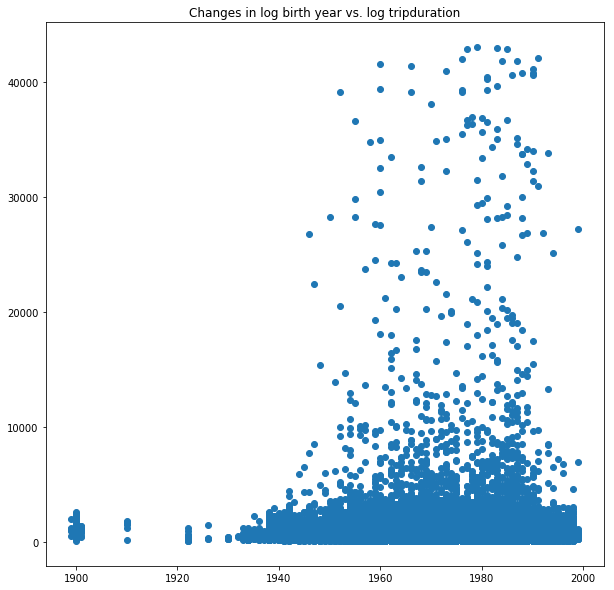

In [110]:
plt.scatter(df['birth year'],df['tripduration'])
plt.title('Changes in log %s vs. log %s' % ('birth year','tripduration'))

In [111]:
df['date'] = pd.to_datetime(df['starttime'])

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
df.loc[df['birth year'] > 1990, '>1990'] = 1
df.loc[df['birth year'] <= 1990, '>1990'] = 0

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [142]:
df.head()

,tripduration,birth year,starttime,gender,ratio,date,>1990
0,1346,1960.0,1/1/2015 0:01,2,0.984430,2015-01-01 00:01:00,0.0
1,363,1963.0,1/1/2015 0:02,1,0.985937,2015-01-01 00:02:00,0.0
2,346,1974.0,1/1/2015 0:04,1,0.988978,2015-01-01 00:04:00,0.0
3,182,1969.0,1/1/2015 0:04,1,0.987958,2015-01-01 00:04:00,0.0
4,969,1977.0,1/1/2015 0:05,1,0.990481,2015-01-01 00:05:00,0.0


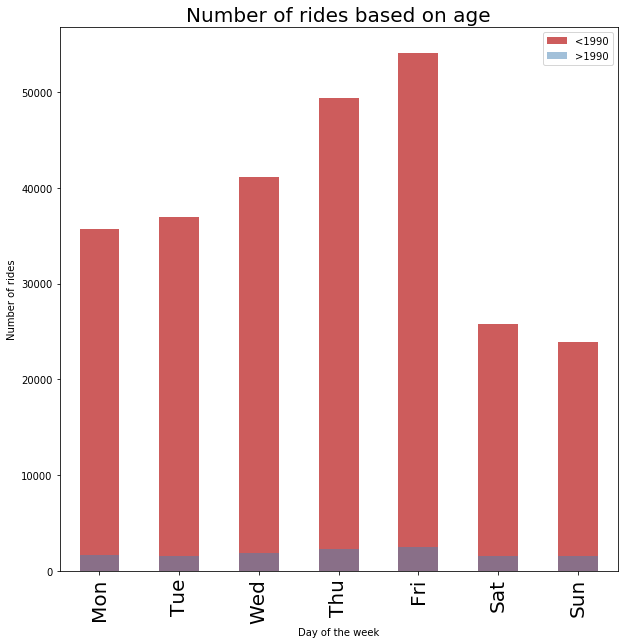

In [118]:
fig = pl.figure(figsize(10,10))
norm_w = 1
((df['date'][df['>1990'] == 0].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', label='<1990')
#((df['date'][df['>1990'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', label='>=1990')
norm_m = 1
ax = ((df['date'][df['>1990'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", color='SteelBlue', alpha=0.5, label='>1990')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.title('Number of rides based on age',fontsize=20)
pl.legend()

In [125]:
df.loc[df['birth year'] > 1990, '>1990'] = 1
df.loc[df['birth year'] <= 1990, '>1990'] = 0

/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Biker born after 1990: week:0.000, weekend:0.000, weekend error:0.000, weekend error:0.000
Biker born before 1990: week:0.000, weekend:0.000, weekend error:0.000, weekend error:0.000


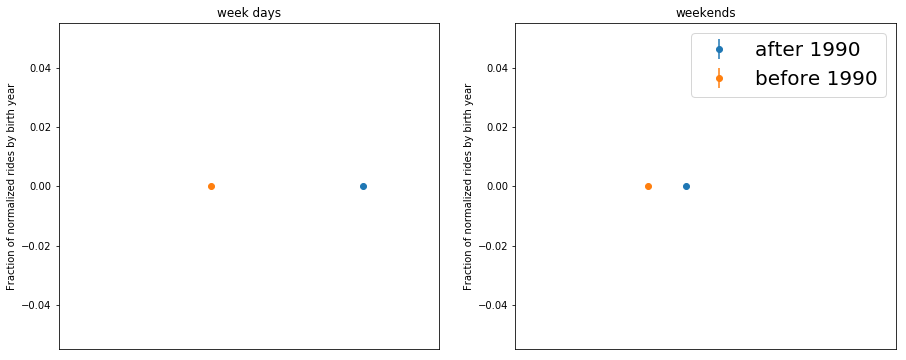

In [137]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

counts_1 = df.date[df['birth year'] == 1].groupby([df.date.dt.weekday]).count()
norm_1 = 1
error_1 = np.sqrt(counts_1)

week_1 = sum(counts_1[:-2]) * 1.0 / norm_1  #fraction of women riding on week days
weekend_1 = sum(counts_1[-2:]) * 1.0 / norm_1  #fraction of women riding on weekends
eweek_1 = np.sqrt(sum(error_1[:-2]**2)) / norm_1  #error on fraction number of women riding on week days
eweekend_1 = np.sqrt(sum(error_1[-2:]**2)) / norm_1 #error on fraction number of women riding on weekends

#same nomenclature as above
counts_2 = df.date[df['birth year'] == 0].groupby([df.date.dt.weekday]).count()
norm_2 = 1
error_2=np.sqrt(counts_2)
week_2 = sum(counts_2[:-2]) * 1.0 / norm_2
weekend_2 = sum(counts_2[-2:]) * 1.0 / norm_2
eweek_2 = np.sqrt(sum(error_2[:-2]**2)) / norm_2
eweekend_2 = np.sqrt(sum(error_2[-2:]**2)) / norm_2

print("Biker born after 1990: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_1, weekend_1, eweek_1, eweekend_1))
print("Biker born before 1990: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_2, weekend_2, eweek_2, eweekend_2))

ax1.errorbar([0.4], [week_1], yerr=[eweek_1], fmt='o', label='after 1990')
ax1.errorbar([0.2], [week_2], yerr=[eweek_2], fmt='o', label='before 1990')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_1], yerr=[eweekend_1], fmt='o', label='after 1990')
ax2.errorbar([0.2], [weekend_2], yerr=[eweekend_2], fmt='o', label='before 1990')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by birth year")
ax1.set_ylabel("Fraction of normalized rides by birth year")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

In [148]:
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_1, weekend_2, norm_1, norm_2), norm_1, norm_2)
# print (sp_stdev_mw)
z = zscore(weekend_1, weekend_2, sp_stdev_mw)
print ("The z statistics is %.2f"%z)

The z statistics is nan


/nfshome/yy2908/.conda/envs/Shelly/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
